In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

print("setup complete")

setup complete


In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("salaries.csv")

In [5]:
df.head(10)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [11]:
x=df.drop("salary_more_then_100k", axis="columns")


In [9]:
y=df["salary_more_then_100k"]
y.head(10)

0    0
1    0
2    1
3    1
4    0
5    1
6    0
7    0
8    0
9    1
Name: salary_more_then_100k, dtype: int64

In [10]:
company_l=LabelEncoder()
job_l=LabelEncoder()
degree_l=LabelEncoder()

In [13]:
x['companyn']=company_l.fit_transform(x['company'])
x['jobn']=company_l.fit_transform(x['job'])
x['degreen']=company_l.fit_transform(x['degree'])
x.head()

,company,job,degree,companyn,jobn,degreen
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [15]:
x=x.drop(['company','job','degree'], axis="columns")
x.head()

,companyn,jobn,degreen
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [17]:
from sklearn import tree

In [18]:
model=tree.DecisionTreeClassifier()
xtrain,xtest, ytrain,ytest= train_test_split(x, y, test_size=0.3)

In [19]:
model.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [21]:
acc=model.score(xtest, ytest)
print("accuracy {}%".format(acc*100))

accuracy 80.0%


In [48]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
X=df.drop(['Name','Cabin','Ticket'], axis="columns")
X=X.dropna()
Y=X['Survived']

In [61]:
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [62]:
sex_l=LabelEncoder()
Embarked_l=LabelEncoder()
X['sexen']=sex_l.fit_transform(X['Sex'])
X['embarkeden']=Embarked_l.fit_transform(X['Embarked'])
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sexen,embarkeden
0,1,0,3,male,22.0,1,0,7.2500,S,1,2
1,2,1,1,female,38.0,1,0,71.2833,C,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,53.1000,S,0,2
4,5,0,3,male,35.0,0,0,8.0500,S,1,2


In [63]:
X=X.drop(['Sex','Embarked'], axis="columns")
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sexen,embarkeden
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


In [67]:
model=tree.DecisionTreeClassifier()
xtrain,xtest, ytrain,ytest= train_test_split(X, Y, test_size=0.3)
model.fit(xtrain, ytrain)
acc=model.score(xtest, ytest)
print("accuracy {}%".format(acc*100))

accuracy 100.0%


In [77]:
yhat=model.predict(xtest)
yhat=yhat.reshape(-1,1)
yhat

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [71]:
ytest

377    0
500    0
539    1
421    0
337    1
      ..
631    0
777    1
191    0
816    0
474    0
Name: Survived, Length: 214, dtype: int64

In [78]:
from sklearn.metrics import confusion_matrix

ypre=model.predict(xtest)
cm = confusion_matrix(ytest, ypre)
cm

array([[132,   0],
       [  0,  82]], dtype=int64)

Text(69.0, 0.5, 'True')

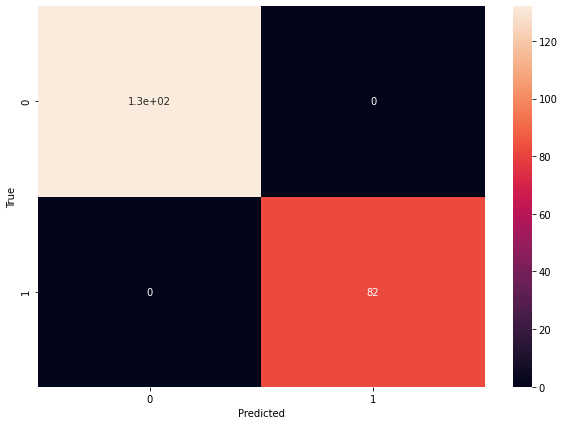

In [79]:
import seaborn as sn
plt.figure(figsize =( 10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")